In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 5

In [79]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

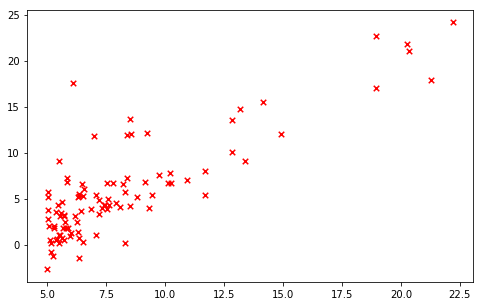

In [80]:
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=4)

## Univariate Linear Regression

In [81]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    sqErr = np.square(h-y)
    J = 1/(2*m)*np.sum(sqErr)
    
    return J

In [82]:
theta = [[0],[0]]
computeCost(X, y, theta)

32.072733877455676

In [83]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros((num_iters, 1))
    
    for i in range(0,num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)

In [84]:
def normalEquation(X, y):
    inv = np.linalg.inv(X.T.dot(X))
    theta = inv.dot(X.T.dot(y))
    return theta

Theta using gradient descent is: [-3.63029144  1.16636235]


(0, 1500)

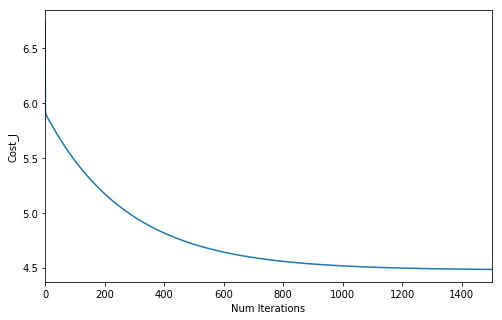

In [85]:
# using gradient descent to calcualte the value of theta
initial_theta = np.zeros((2,1))
theta, Cost_J = gradientDescent(X, y, initial_theta, num_iters=1500)
print('Theta using gradient descent is: {}'.format(theta.ravel()))

plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Num Iterations')
plt.xlim(0, 1500)

In [86]:
# using normal equation to calculate the value of theta
n_theta = normalEquation(X, y)
print('Theta using normal equation is: {}'.format(n_theta.ravel()))

Theta using normal equation is: [-3.89578088  1.19303364]


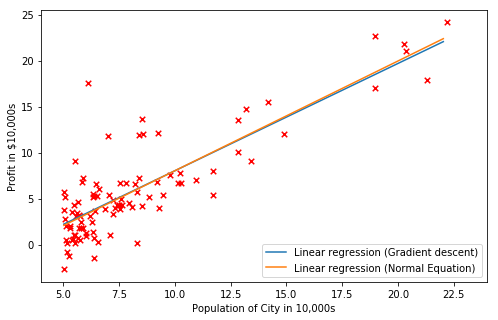

In [87]:
xx = np.arange(np.min(X[:, 1]), np.max(X[:, 1]))
yy = theta[0] + theta[1] * xx
yy_n = n_theta[0] + n_theta[1] * xx

# Plot for gradient descent
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')
plt.plot(xx, yy_n, label='Linear regression (Normal Equation)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);